# Exercise 1: Linear Algebra (20 points)

One of the challenges in machine learning is moving from the formal linear algebra formulation to a practical implementation with discrete vectors.

Let us look again at the NAND gate implementation with a single perceptron node.
The node has two inputs $x_1$ and $x_2$ and a single output.

The perceptron node implements a transformation between input $\vec{x}$ and output $y$ described by
$$y = f({\bf x}; {\bf w}, b) = {\bf w}^T {\bf x} + b.$$



## Describe the form of the input ${\bf x}$.

Is it a column vector
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$
 or a row vector
$\begin{bmatrix}
x_1
x_2
\end{bmatrix}$
 ? If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Answer:
As a tourch tensor it would be a N by 1 coulmn tensor in this case it would be a 2 by 1 tensor.

## Describe the form of the weights ${\bf w}$.

Is it a square array or something else? If it were to be implemented as a PyTorch tensor, what should its dimensions be? Does your answer make sense in the equation above with ${\bf w}^T$?

## Answer:

W would be a coloumn tensor of N by 1 dimesnions such that each index corresponds to the weight for that $⃗⃗{\vec x_i}$. Taking the transpose of this tensor ensures that when multipling by the column vector $⃗⃗{\vec x}$ you obtain a scalar value. This provides the output y.

## Describe the form of the bias $b$.

If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Answer:

b would be a Scalar tensor in pytorch


## Calculate $y$ with weights and bias

Take $w_1=w_2=-2$ and $b=3$.
Then calculate the perceptron outputs for
- $y = f(x_1=0, x_2=0) = 0+0+3 = 3$

- $y = f(x_1=0, x_2=1) = -2+3 = 1$

- $y = f(x_1=1, x_2=0) = -2+3 = 1$
- $y = f(x_1=1, x_2=1)= -2-2+3= -1$

What final piece is missing in this model, if the goal is produce a truth table with $y$ equal to 0 or 1?
Add the missing piece to your calculation to verify that this model has learned the NAND logic table.

We need an activation fuction to take the output of the weights and decided if it is within the 0 or 1 threshold.

In this case, a step (threshold) function can be used:
$
f(z) =
\begin{cases}
1, & z \ge 0, \\
0, & z < 0.
\end{cases}
$

Applying this activation to the weighted sums computed above yields the NAND truth table.


y=1
y=1
y=1
y=0


# Exercise 2: Linear Regression (40 points)

In this exercise we will use a simple perceptron (one node) to calculate the linear regression for the function $f(x) = y$.

In this exercise each data point has a single $x$ and a single $y$.

Fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [2]:
import torch
from torch.autograd import Variable

x_data_tensor = torch.Tensor([[0.0500],[0.0591],[0.0682],[0.0773],[0.0864],
        [0.0955],[0.1045],[0.1136],[0.1227],[0.1318],
        [0.1409],[0.1500],[0.1591],[0.1682],[0.1773],
        [0.1864],[0.1955],[0.2045],[0.2136],[0.2227],
        [0.2318],[0.2409],[0.2500],[0.2591],[0.2682],
        [0.2773],[0.2864],[0.2955],[0.3045],[0.3136],
        [0.3227],[0.3318],[0.3409],[0.3500],[0.3591],
        [0.3682],[0.3773],[0.3864],[0.3955],[0.4045],
        [0.4136],[0.4227],[0.4318],[0.4409],[0.4500],
        [0.4591],[0.4682],[0.4773],[0.4864],[0.4955],
        [0.5045],[0.5136],[0.5227],[0.5318],[0.5409],
        [0.5500],[0.5591],[0.5682],[0.5773],[0.5864],
        [0.5955],[0.6045],[0.6136],[0.6227],[0.6318],
        [0.6409],[0.6500],[0.6591],[0.6682],[0.6773],
        [0.6864],[0.6955],[0.7045],[0.7136],[0.7227],
        [0.7318],[0.7409],[0.7500],[0.7591],[0.7682],
        [0.7773],[0.7864],[0.7955],[0.8045],[0.8136],
        [0.8227],[0.8318],[0.8409],[0.8500],[0.8591],
        [0.8682],[0.8773],[0.8864],[0.8955],[0.9045],
        [0.9136],[0.9227],[0.9318],[0.9409],[0.9500]])
y_array = [0.2484659, 0.32902399, 0.54115681, 0.3084831,  0.5618252,  0.36455911,
 0.51350721, 0.59238188, 0.50134166, 0.83304367, 0.7044594,  0.86724902,
 0.8560783,  0.97976775, 0.97786013, 0.67360169, 0.94500984, 1.00788982,
 1.12242341, 1.17383408, 1.12468363, 1.13431148, 1.17662245, 1.3324501,
 1.23486871, 1.16412706, 1.36320016, 1.55521281, 1.38178904, 1.49117572,
 1.58999798, 1.7864531,  1.77436729, 1.72934819, 1.66198311, 1.79041017,
 2.20885834, 1.97323221, 2.1730214,  2.01557034, 2.19822747, 2.08018215,
 2.10432378, 2.13234159, 2.0252848,  2.36310875, 2.22574087, 2.21272699,
 2.35988945, 2.30726429, 2.65259961, 2.60177056, 2.82030711, 2.65299176,
 2.63965026, 2.59975554, 2.82430745, 2.81222783, 2.73346561, 2.80687846,
 2.96686021, 3.01237272, 3.12654109, 3.10471933, 3.01646611, 3.22289136,
 3.28936654, 3.05285429, 3.23316291, 3.39834175, 3.42476185, 3.29001894,
 3.43420673, 3.50978013, 3.60845387, 3.75540575, 3.70630173, 3.68288956,
 3.95154621, 3.66087953, 3.9726395,  4.06565774, 4.14370104, 3.86052788,
 4.00409922, 4.08683924, 4.02585529, 4.37126455, 4.19095016, 4.38038983,
 4.32872869, 4.59454492, 4.49190972, 4.4209342,  4.42530996, 4.6364482,
 4.61110624, 4.63337463, 4.73420358, 4.50500814]

# TO-DO: Add code to create the y data tensor here
# It should match the x data tensor in size and shape
y_data_tensor = torch.Tensor([[yvalue] for yvalue in y_array])
print('x shape', x_data_tensor.shape)
print('y shape', y_data_tensor.shape)

x shape torch.Size([100, 1])
y shape torch.Size([100, 1])


In [3]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # TO-DO: replace M,N with numbers
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)
# TO-DO: update the learning rate to a reasonable value

In [4]:
# TO-DO: update to use your data tensors and a reasonable number of epochs
for epoch in range(10000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = our_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

Streaming output truncated to the last 5000 lines.
epoch 5000, loss 0.012850859202444553
epoch 5001, loss 0.012850815430283546
epoch 5002, loss 0.012850772589445114
epoch 5003, loss 0.012850724160671234
epoch 5004, loss 0.012850687839090824
epoch 5005, loss 0.012850642204284668
epoch 5006, loss 0.012850595638155937
epoch 5007, loss 0.01285055372864008
epoch 5008, loss 0.012850513681769371
epoch 5009, loss 0.01285046711564064
epoch 5010, loss 0.012850428931415081
epoch 5011, loss 0.012850385159254074
epoch 5012, loss 0.012850341387093067
epoch 5013, loss 0.012850303202867508
epoch 5014, loss 0.012850258499383926
epoch 5015, loss 0.012850215658545494
epoch 5016, loss 0.01285017654299736
epoch 5017, loss 0.012850136496126652
epoch 5018, loss 0.01285009179264307
epoch 5019, loss 0.012850050814449787
epoch 5020, loss 0.012850007973611355
epoch 5021, loss 0.012849962338805199
epoch 5022, loss 0.012849927879869938
epoch 5023, loss 0.01284988597035408
epoch 5024, loss 0.012849842198193073
epoc

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

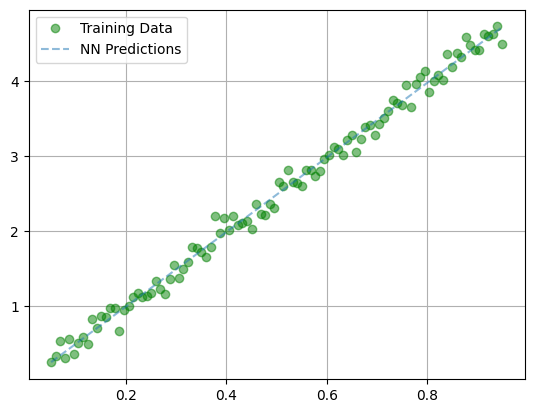

In [5]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = our_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.8$
- $x=1.5$

In [6]:
xdata=torch.Tensor([[-0.2],[0.8],[1.5]])
pred_y = our_model(xdata)
print(pred_y)

tensor([[-0.9888],
        [ 3.9787],
        [ 7.4560]], grad_fn=<AddmmBackward0>)


# Exercise 3: Perceptron (40 points)

In this exercise we will use a multi-layer perceptron to learn a non-linear function $y=f(x)$.

You are given the $x$ and $y$ data, and the task is to produce a machine learning model that can predict $y$ for any given $x$.

As for Exercise 2, fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


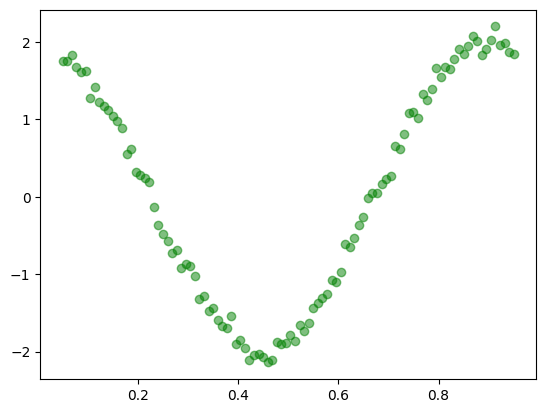

In [7]:
import torch
from torch.autograd import Variable
x_data_tensor = torch.tensor([
    [0.0500], [0.0591], [0.0682], [0.0773], [0.0864],
    [0.0955], [0.1045], [0.1136], [0.1227], [0.1318],
    [0.1409], [0.1500], [0.1591], [0.1682], [0.1773],
    [0.1864], [0.1955], [0.2045], [0.2136], [0.2227],
    [0.2318], [0.2409], [0.2500], [0.2591], [0.2682],
    [0.2773], [0.2864], [0.2955], [0.3045], [0.3136],
    [0.3227], [0.3318], [0.3409], [0.3500], [0.3591],
    [0.3682], [0.3773], [0.3864], [0.3955], [0.4045],
    [0.4136], [0.4227], [0.4318], [0.4409], [0.4500],
    [0.4591], [0.4682], [0.4773], [0.4864], [0.4955],
    [0.5045], [0.5136], [0.5227], [0.5318], [0.5409],
    [0.5500], [0.5591], [0.5682], [0.5773], [0.5864],
    [0.5955], [0.6045], [0.6136], [0.6227], [0.6318],
    [0.6409], [0.6500], [0.6591], [0.6682], [0.6773],
    [0.6864], [0.6955], [0.7045], [0.7136], [0.7227],
    [0.7318], [0.7409], [0.7500], [0.7591], [0.7682],
    [0.7773], [0.7864], [0.7955], [0.8045], [0.8136],
    [0.8227], [0.8318], [0.8409], [0.8500], [0.8591],
    [0.8682], [0.8773], [0.8864], [0.8955], [0.9045],
    [0.9136], [0.9227], [0.9318], [0.9409], [0.9500]
])
y_data_tensor = torch.tensor([
    [ 1.7583], [ 1.7594], [ 1.8341], [ 1.6776], [ 1.6192],
    [ 1.6319], [ 1.2830], [ 1.4240], [ 1.2310], [ 1.1797],
    [ 1.1209], [ 1.0473], [ 0.9846], [ 0.8850], [ 0.5541],
    [ 0.6185], [ 0.3247], [ 0.2793], [ 0.2393], [ 0.1914],
    [-0.1365], [-0.3595], [-0.4752], [-0.5761], [-0.7215],
    [-0.6921], [-0.9243], [-0.8667], [-0.8986], [-1.0227],
    [-1.3271], [-1.2883], [-1.4789], [-1.4397], [-1.5957],
    [-1.6669], [-1.6963], [-1.5355], [-1.8969], [-1.8468],
    [-1.9558], [-2.1036], [-2.0511], [-2.0254], [-2.0736],
    [-2.1414], [-2.1034], [-1.8813], [-1.9003], [-1.8852],
    [-1.7806], [-1.8672], [-1.6624], [-1.7309], [-1.6294],
    [-1.4354], [-1.3698], [-1.3055], [-1.2557], [-1.0780],
    [-1.0991], [-0.9720], [-0.6129], [-0.6491], [-0.5295],
    [-0.3640], [-0.2636], [-0.0167], [ 0.0487], [ 0.0429],
    [ 0.1645], [ 0.2342], [ 0.2722], [ 0.6613], [ 0.6190],
    [ 0.8127], [ 1.0884], [ 1.1002], [ 1.0179], [ 1.3273],
    [ 1.2551], [ 1.3914], [ 1.6677], [ 1.5505], [ 1.6793],
    [ 1.6582], [ 1.7866], [ 1.9044], [ 1.8406], [ 1.9540],
    [ 2.0823], [ 2.0165], [ 1.8276], [ 1.9111], [ 2.0306],
    [ 2.2018], [ 1.9585], [ 1.9884], [ 1.8752], [ 1.8503]
])

plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)

Check the model being constructed.
What do you think is the best architecture to learn this dataset?
(You can change your mind later.)

In [14]:
# TO-DO: check architecture. Is this right for the problem?
# Answer: No I think we Need a polyomial fit which is not a linear problem
from torch import nn, optim
complex_model = nn.Sequential(
    nn.Linear(1, 4),
    nn.Sigmoid(),
    nn.Linear(4, 3),
    nn.Sigmoid(),
    nn.Linear(3, 1)
)

# TO-DO: update the learning rate
criterion = nn.MSELoss()
optimizer = optim.SGD(complex_model.parameters(), lr=0.001)

In [15]:
# TO-DO: update number of epochs
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = complex_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 2.5270307064056396
epoch 1, loss 2.52316951751709
epoch 2, loss 2.5193374156951904
epoch 3, loss 2.5155348777770996
epoch 4, loss 2.5117616653442383
epoch 5, loss 2.508017063140869
epoch 6, loss 2.5043015480041504
epoch 7, loss 2.5006139278411865
epoch 8, loss 2.496954917907715
epoch 9, loss 2.493323564529419
epoch 10, loss 2.489720344543457
epoch 11, loss 2.4861443042755127
epoch 12, loss 2.482595443725586
epoch 13, loss 2.479074001312256
epoch 14, loss 2.4755797386169434
epoch 15, loss 2.472111463546753
epoch 16, loss 2.46867036819458
epoch 17, loss 2.46525502204895
epoch 18, loss 2.4618659019470215
epoch 19, loss 2.4585022926330566
epoch 20, loss 2.455164909362793
epoch 21, loss 2.451852798461914
epoch 22, loss 2.448565721511841
epoch 23, loss 2.4453036785125732
epoch 24, loss 2.4420669078826904
epoch 25, loss 2.438854455947876
epoch 26, loss 2.435666561126709
epoch 27, loss 2.4325027465820312
epoch 28, loss 2.4293630123138428
epoch 29, loss 2.4262473583221436
epoch 30

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

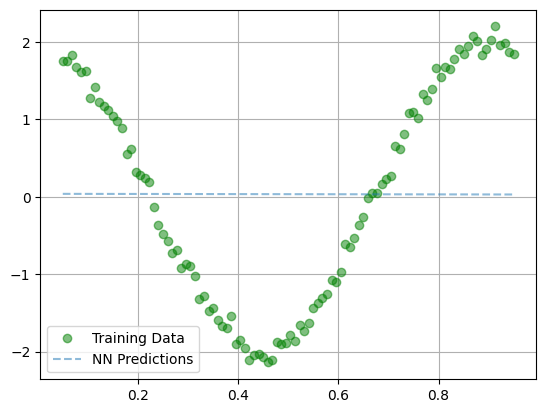

In [10]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = complex_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.4$
- $x=0.8$

In [ ]:
# TO-DO: put your prediction code (aka inference code) here